# Temporal Difference

In [40]:
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [41]:
states = ['s_down', 's_-2', 's_-1', 's_0', 's_1', 's_2', 's_up'] 
state0 = 's_0'

In [42]:
def reward(state):
    return 1 if state == 's_up' else 0

In [43]:
def environment(state, action):
    state_idx = states.index(state)
    if action == 'left':
        new_state = states[state_idx - 1]
    else:
        new_state = states[state_idx + 1]
    
    return new_state, reward(new_state)


# TD(0)

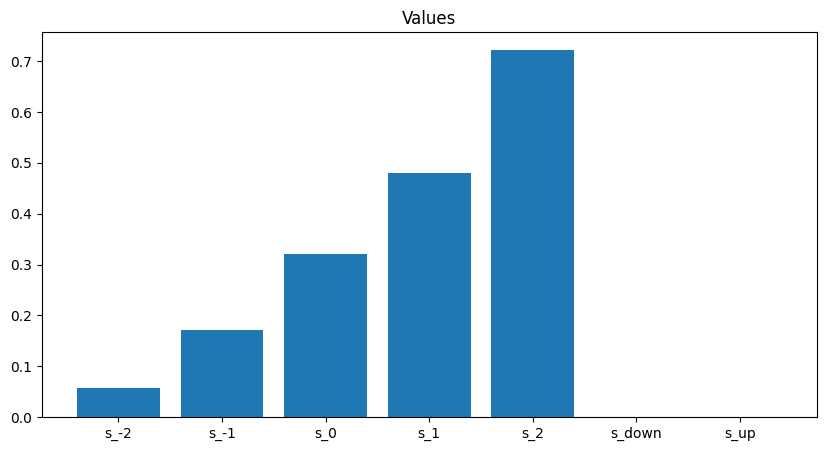

In [57]:
# initialize Q(s,a): state action values
V = {}
for s in states[1:-1]:
    V[s] = 0.1
V[states[0]] = 0; V[states[-1]] = 0 # terminal states = 0 value
alpha = 0.05
for i in range(100):
    state = state0
    while state != 's_up' and state != 's_down':
        action = random.choice(['left', 'right'])
        new_state, reward_val = environment(state, action)
        V[state] = V[state] + alpha*(reward_val + 1*V[new_state] - V[state])

        state = new_state

    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.bar(list(V.keys()), list(V.values())); plt.title('Values')
    plt.show()

In [51]:
def choose_greedy_action(Q, state):
    if state == 's_up'  or state == 's_down':
        return '.'
    left_state_val = Q[state + '+' + 'left']
    right_state_val = Q[state + '+' + 'right']

    if right_state_val >= left_state_val:
        return 'right'
    else:
        return 'left'


# SARSA

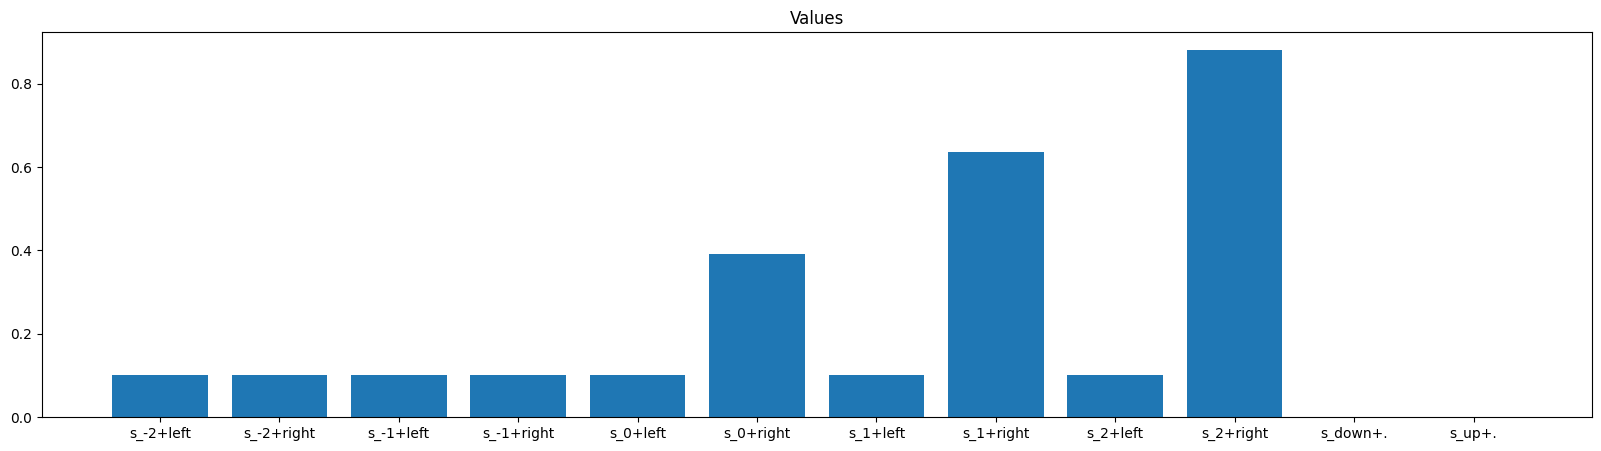

In [54]:
policy = {s: random.choice(['left', 'right']) for s in states[1:-1]}

Q = {}
for s in states[1:-1]:
    Q[s + '+' + 'left'] = 0.1
    Q[s + '+' + 'right'] = 0.1

# terminal states
Q[states[0] + '+' + '.'] = 0; Q[states[-1] + '+' + '.'] = 0

alpha = 0.01
for i in range(200):
    state = state0
    action = choose_greedy_action(Q, state)
    while state != 's_up' and state != 's_down':
        new_state, reward_val = environment(state, action)
        new_greedy_action = choose_greedy_action(Q, new_state)
        # S, A, R, S', A' 
        Q[state + '+' + action] += alpha * (reward_val + 1*Q[new_state + '+' + new_greedy_action] -  Q[state  + '+' + action])

        state = new_state
        action = new_greedy_action
        
    clear_output(wait=True)
    plt.figure(figsize=(20, 5))
    plt.bar(list(Q.keys()), list(Q.values())); plt.title('Values')
    plt.show()